## BIKE SHARING


#### Problem Statement:

##### A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



### Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [3]:
#load the dataset
bike = pd.read_csv(r"C:\Users\em574\Downloads\day (1).csv")

In [4]:
#routine check
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#check the shape of the data
bike.shape

(730, 16)

In [9]:
#check the size of the data.
bike.size

11680

In [10]:
#there are 730 rows and 16 columns.


##### Data quality check

In [11]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
#There are no null values in the dataset.

In [13]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Duplicate check 

In [14]:
#create a new dummy variable to check duplicates.
bike_dum = bike

#check for duplicates.
bike_dum.drop_duplicates(subset = None, inplace = True)

In [15]:
bike_dum.shape

(730, 16)

In [16]:
#there are no duplicate rows because the there is no change in number of rows and columns.

In [17]:
#check the dimensions of the data.
bike_dum.ndim

2

### 2. DATA CLEANING

In [18]:
#dropping unwanted columns.


In [19]:
#before dropping the dteday column we will create a variabe of how old is the business.
bike['days_old']=(pd.to_datetime(bike['dteday'], format='%d-%m-%Y')- pd.to_datetime('01-01-2018', format='%d-%m-%Y')).dt.days

In [20]:
#inspect once. 
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [21]:
# Dropping instant column as it is index column which has nothing to fo with the target.
bike.drop(['instant'], axis = 1, inplace = True)

In [22]:
# Dropping dteday column as we have already month and weekday columns.
bike.drop(['dteday'], axis = 1, inplace = True)

In [23]:
# Dropping casual and registered columns as we have cnt column which is sum of the both that is the target column
bike.drop(['casual'], axis = 1, inplace = True)
bike.drop(['registered'], axis = 1, inplace = True)

In [24]:
#inspecct df after dropping columns.
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [25]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 79.8 KB


In [26]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [27]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [28]:
bike.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [29]:
bike.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [30]:
bike.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


In [31]:
#we can see that features like season, mnth, weekday and weathersit are integers although they should be non-numerical categories

#### Handle outliers

In [32]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [33]:
#check unique values in each column
bike.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

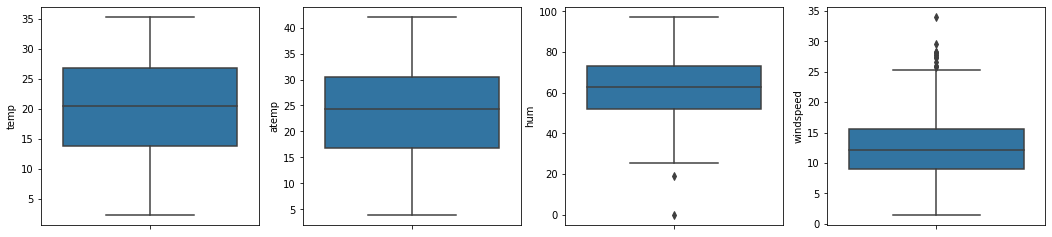

In [34]:
# Draw box plots for independant variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i=1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike)
    i+=1

In [35]:
#from these plots we can see that there no outliers to be handled.

### 3. EDA

In [36]:
#converting columns to categorical types.
colum = ['season', 'weathersit','mnth','weekday']
for col in colum:
    bike[col]=bike[col].astype('category')

In [37]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
 12  days_old    730 non-null    int64   
dtypes: category(4), float64(4), int64(5)
memory usage: 60.9 KB


In [38]:
bike.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)

bike.weathersit.replace({1:'good', 2:'moderate', 3:'bad', 4:'severe'}, inplace=True)

bike.mnth = bike.mnth.replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'})

bike.weekday = bike.weekday.replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [39]:
#inspecct once
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


#### Draw pairplots to check linear relationship.


<Figure size 1080x2160 with 0 Axes>

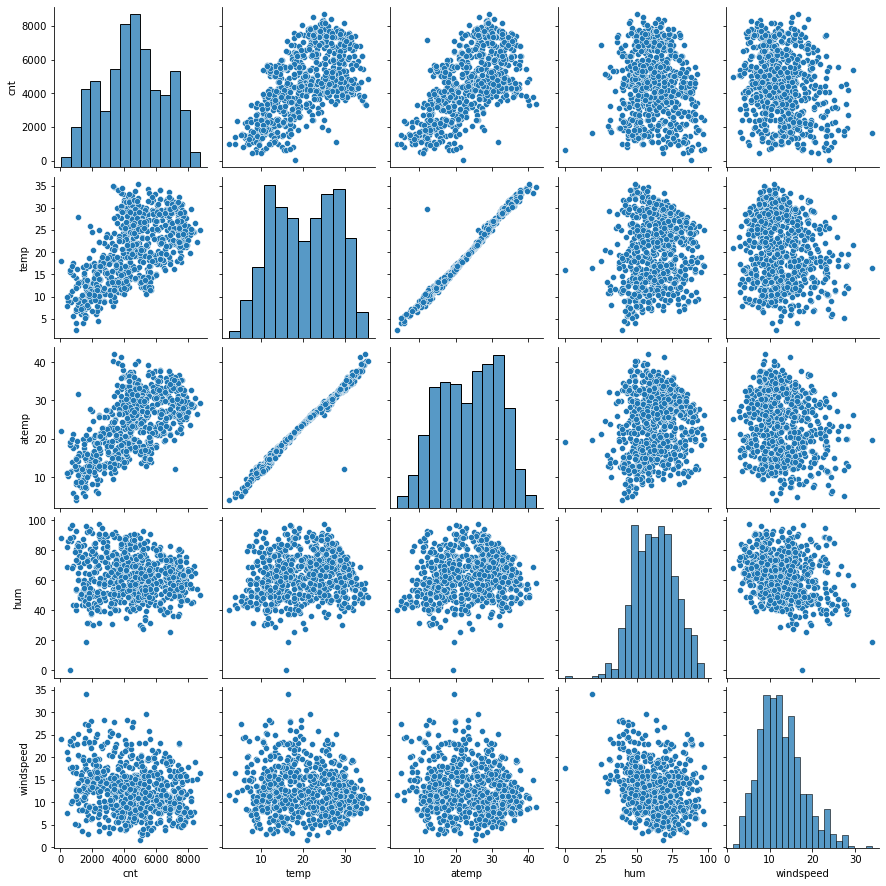

In [40]:
#Draw pairplots for continuous numeric varibles using seaborn
plt.figure(figsize=(15,30))
sns.pairplot(data=bike, vars=['cnt','temp','atemp', 'hum','windspeed'])
plt.show()

Inference:
    
    temp and atemp are highly correalted with each other.
    
    temp and atemp are highly correalted with target variable cnt.


### Visualising the numeric variables

<Figure size 1440x1080 with 0 Axes>

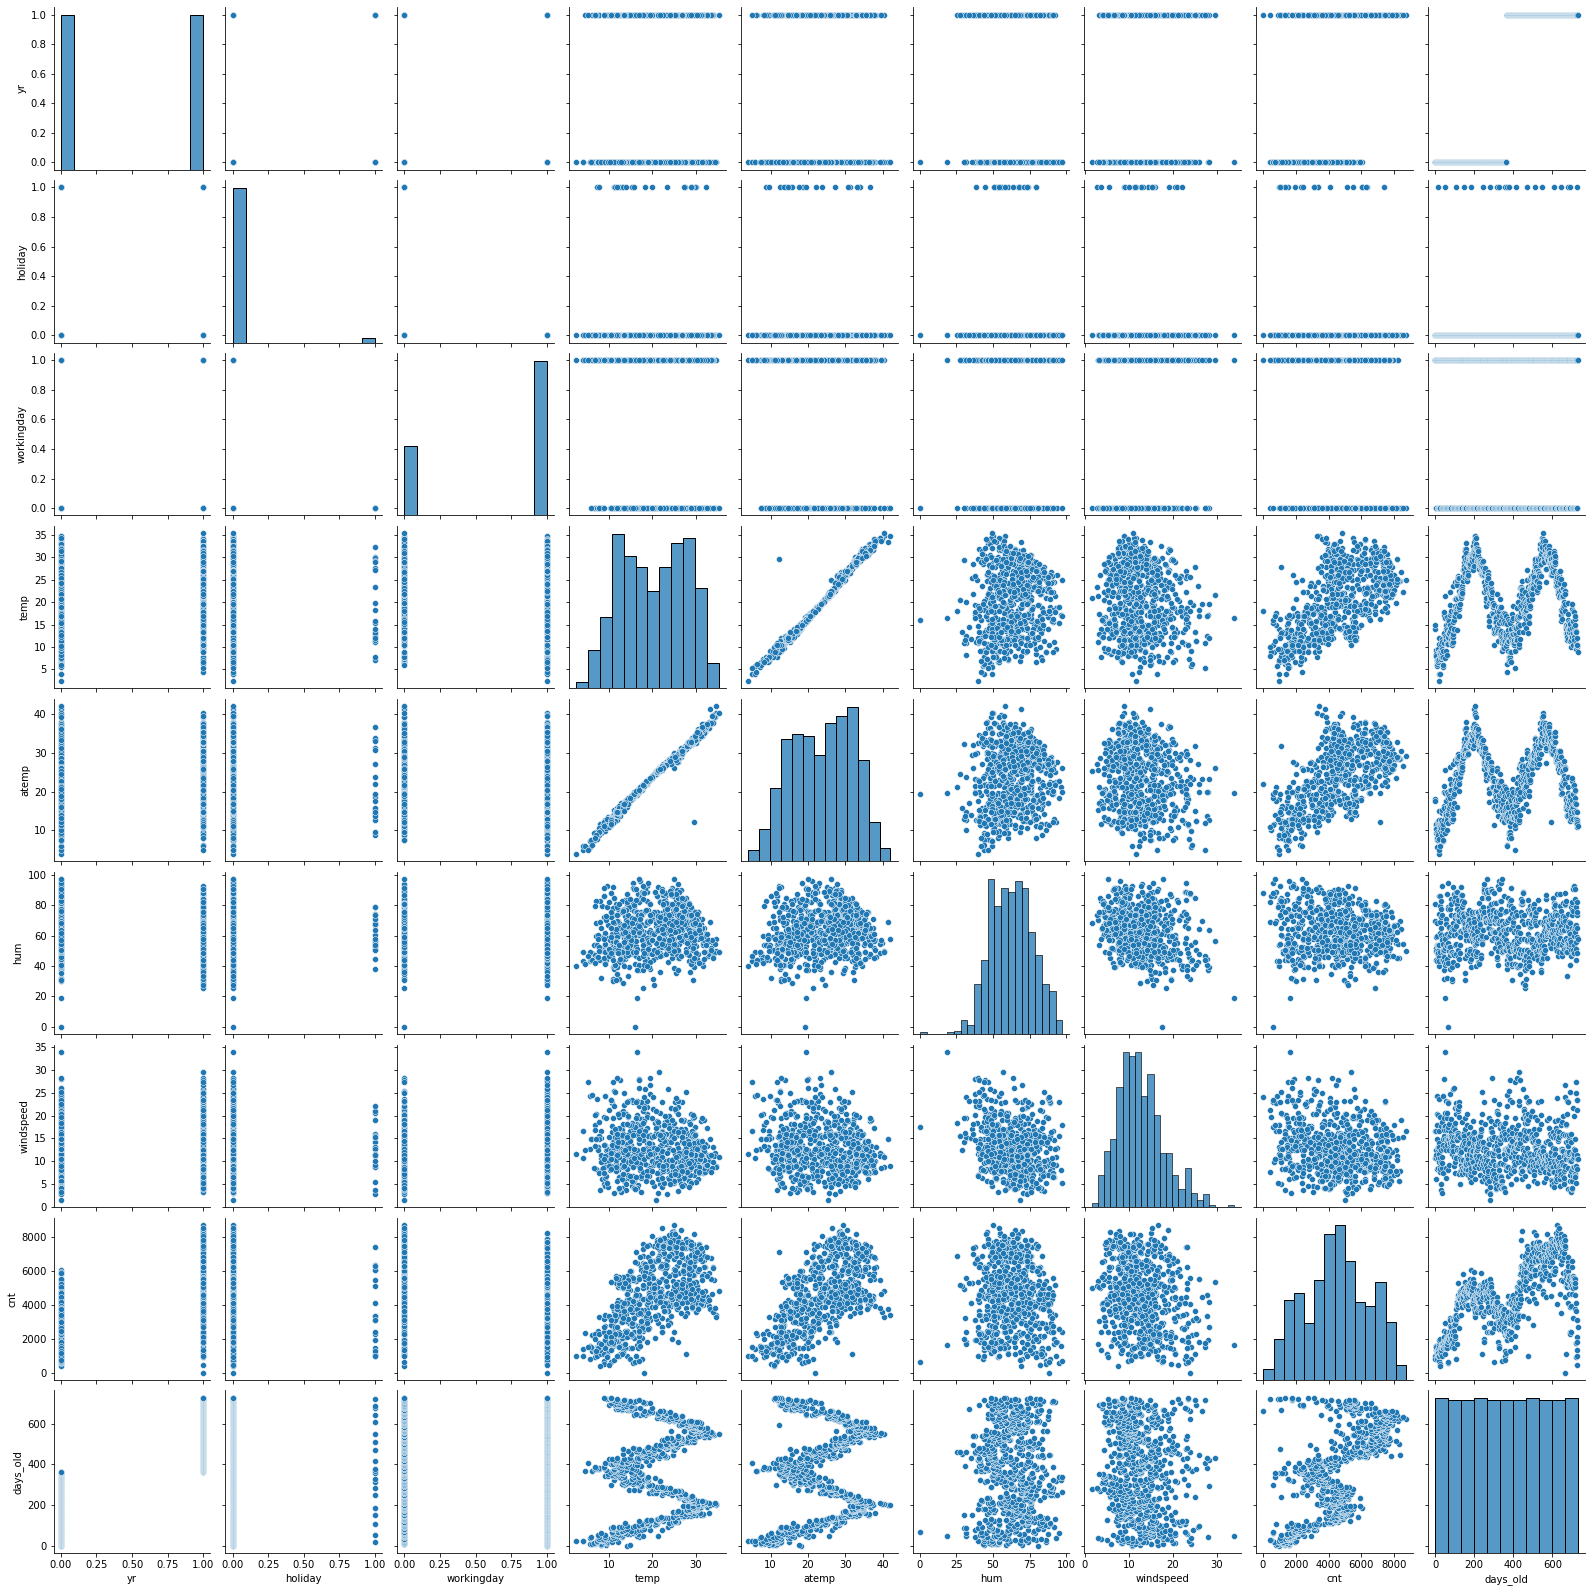

In [41]:
plt.figure(figsize = (20,15))
sns.pairplot(bike)
plt.show()


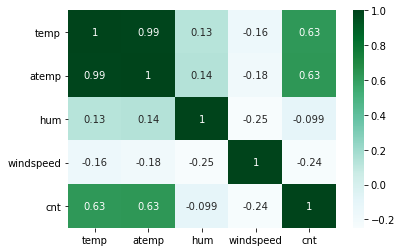

In [42]:
# Checking continuous variables relationship with each other
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot=True)
plt.show()

#### Here we see that temp and atemp has correlation 0.99 means almost 1 (highly co-related).

In [43]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


#### Heatmap of correlation between variables.

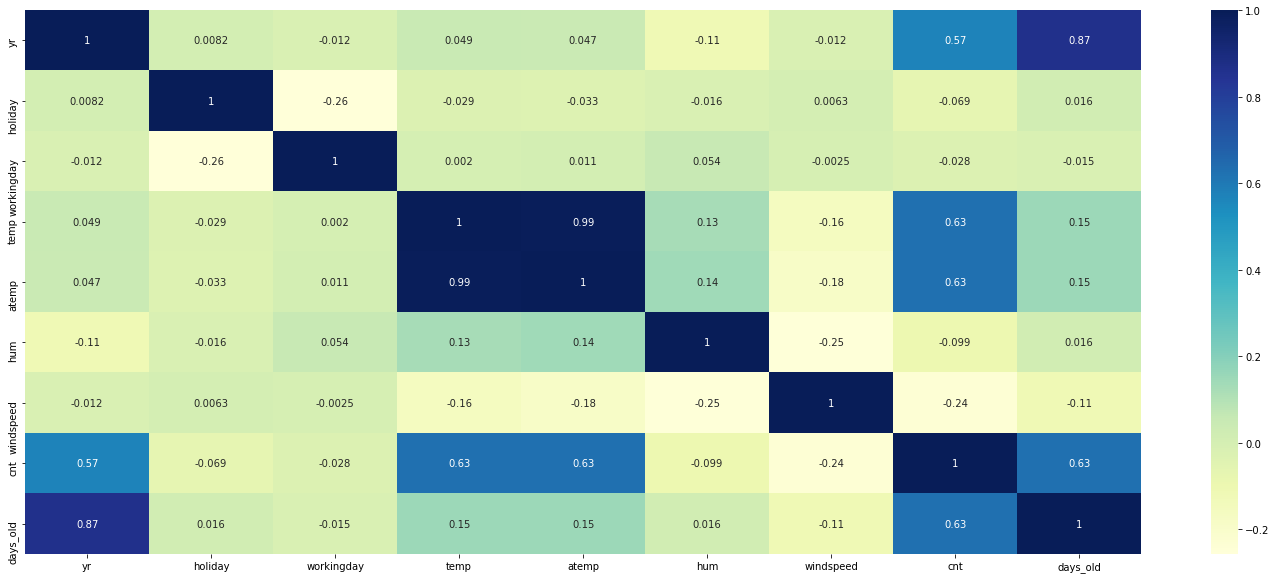

In [44]:
#calculate correlation
corr = bike.corr()
plt.figure(figsize=(25,10))

#draw heatmaps
sns.heatmap(corr,annot=True, cmap='YlGnBu')
plt.show()

#### from the correlation map temp,atemp and days_old seem to be highly correlated.

### 4. Anaysing Categorical variables with target variable.

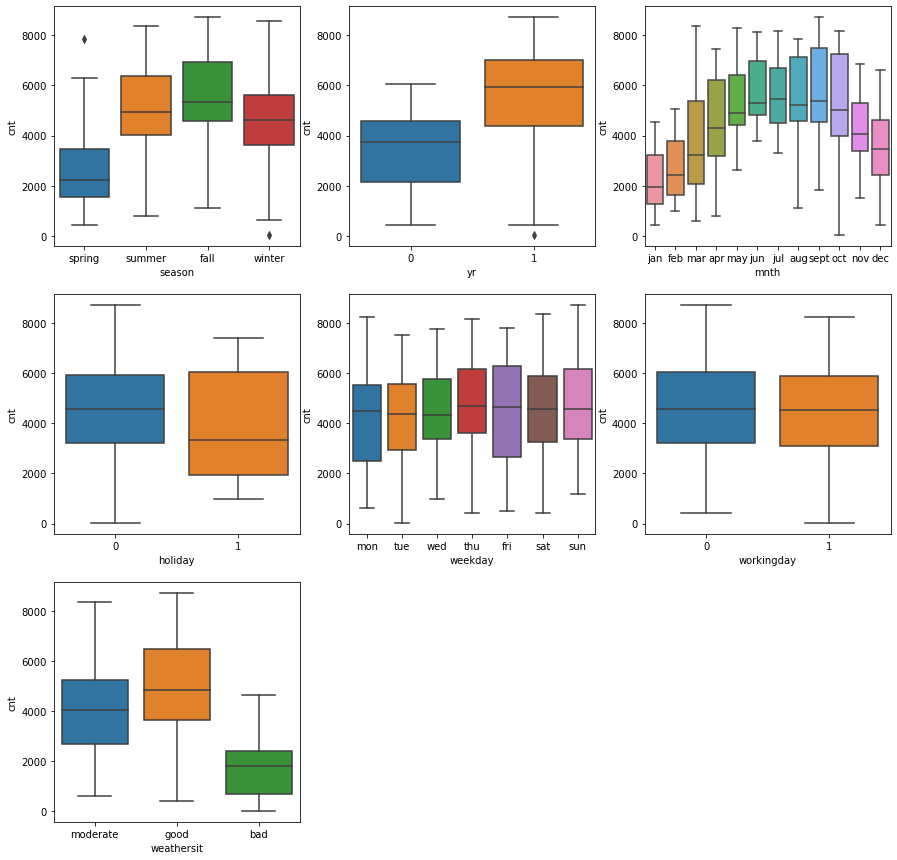

In [45]:
# Boxplot for categorical var to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15,15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike, x=i[1],y='cnt')
plt.show()    

#### _`Inference`_:
1. Season: 3->fall has highest demand for rental bikes.
2. The demand for the next year has grown as we look at the 2nd plot.
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing.
4. When there is a holiday, demand has decreased.
5. weekday is not giving clear picture about demand.
6. The clear weathersit has highest demand.
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extreme weather conditions.

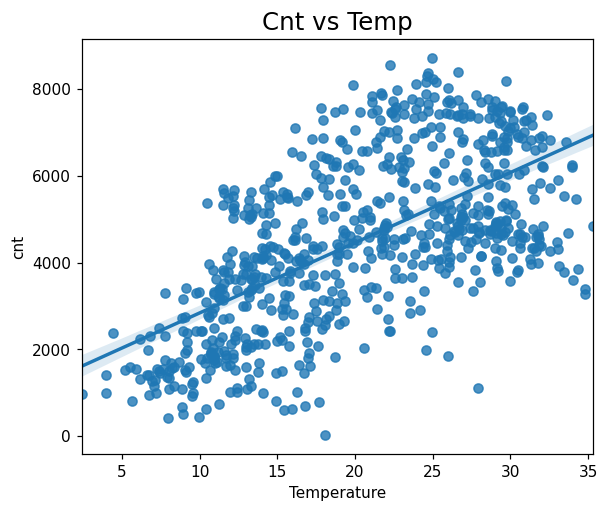

In [46]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp", fontsize=16)
sns.regplot(data=bike,y='cnt',x='temp')
plt.xlabel('Temperature')
plt.show()

#### _`Inference`_:
1. Demand for bikes is positively correlated to temp.
2. We can see that cnt is linearly increasing with temp indicating linear relation.

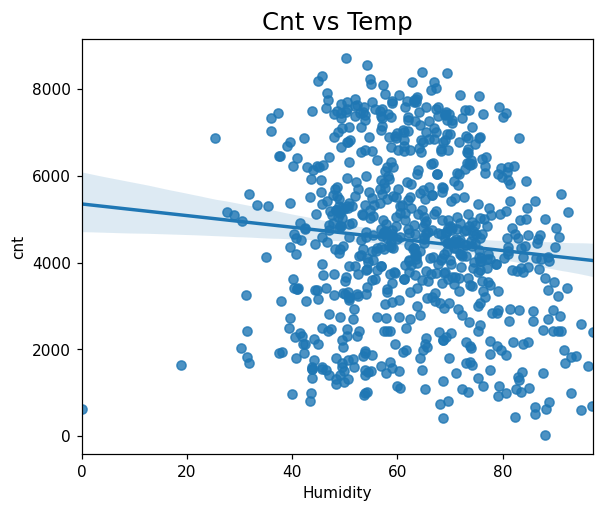

In [47]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp", fontsize=16)
sns.regplot(data=bike,y='cnt',x='hum')
plt.xlabel('Humidity')
plt.show()

#### _`Inference`_:
1. Hum values are more scattered around.
2. Although we can see cnt decreasing with increase in humidity.

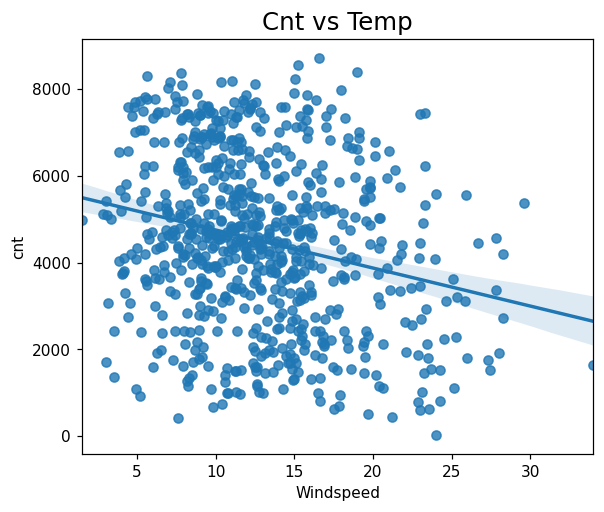

In [48]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp", fontsize=16)
sns.regplot(data=bike,y='cnt',x='windspeed')
plt.xlabel('Windspeed')
plt.show()

#### _`Inference`_:
1. Windspeed values are more scattered around.
2. Although we can see cnt decreasing with increase in windspeed.

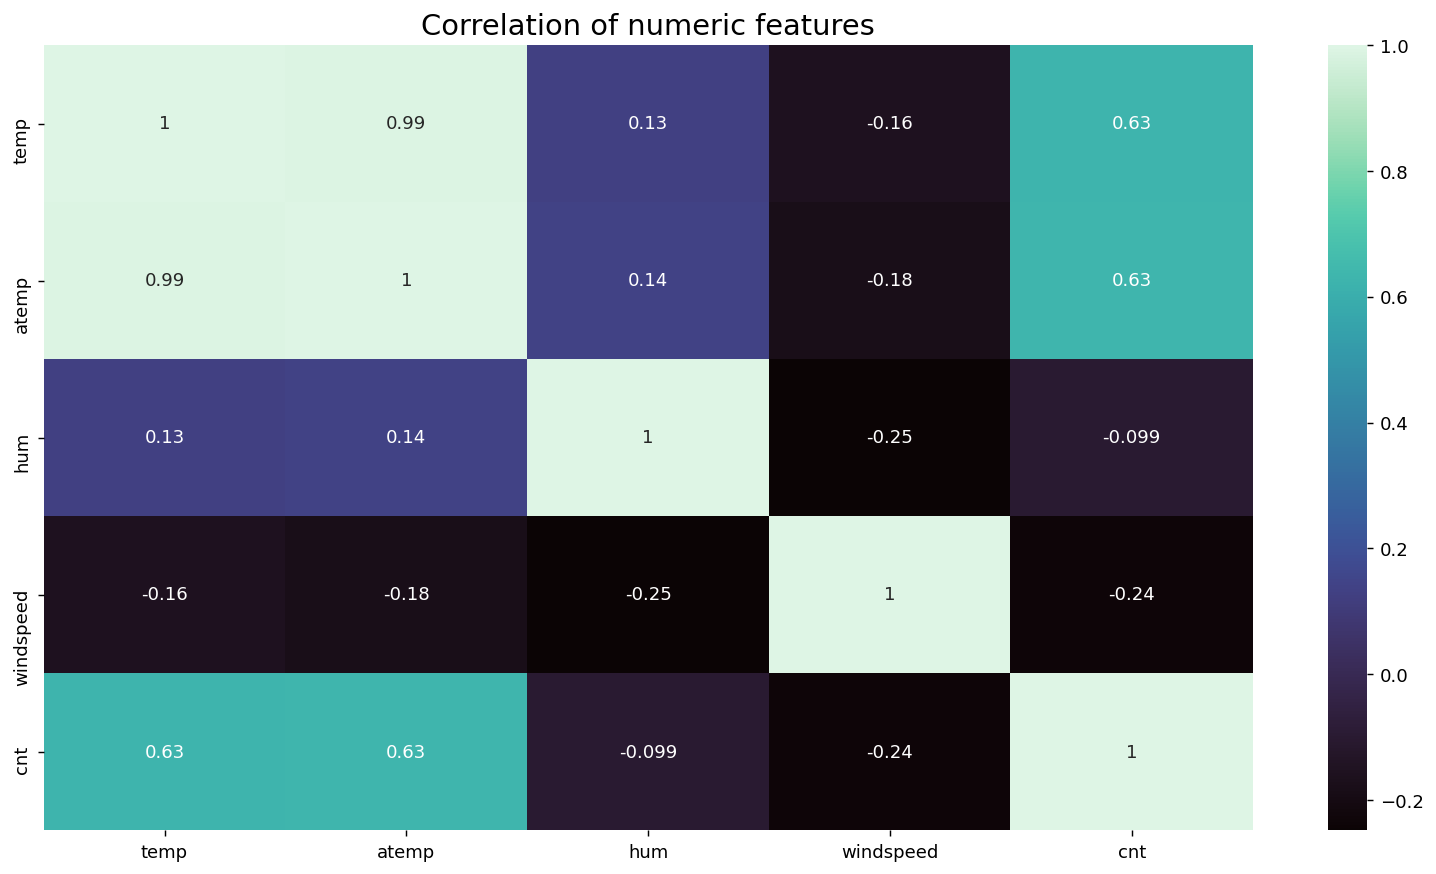

In [49]:
num_feat=['temp','atemp','hum','windspeed','cnt']
plt.figure(figsize=(15,8),dpi=130)
plt.title('Correlation of numeric features',fontsize=16)
sns.heatmap(bike[num_feat].corr(),annot=True,cmap='mako')
plt.show()

In [50]:
# temp and atemp are highly correlated.

## 5. Data Preparation for Linear Regression 

#### Create dummy variables for categorical variables.

In [51]:
bike = pd.get_dummies(data=bike, columns=['season','mnth','weekday'], drop_first=True)
bike = pd.get_dummies(data=bike,columns=['weathersit']) 

- Dropping the first columns as (p-1) dummies can explain p categories.
- In weathersit first column is not dropped so as to not lose info about severe weather conditions.

In [52]:
#print columns after creating dummies.
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [53]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   days_old             730 non-null    int64  
 9   season_spring        730 non-null    uint8  
 10  season_summer        730 non-null    uint8  
 11  season_winter        730 non-null    uint8  
 12  mnth_aug             730 non-null    uint8  
 13  mnth_dec             730 non-null    uint8  
 14  mnth_feb             730 non-null    uint8  
 15  mnth_jan             730 non-null    uin

In [54]:
#print rows to inspect
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


In [55]:
bike.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000,0.246575,...,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.634247,0.336986
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136,0.431313,...,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.481971,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6. Model Building.

In [56]:
#checking shape before splitting
bike.shape

(730, 32)

In [57]:
#y to contain only target var
y= bike.pop('cnt')

#X is all remaining var also our independant vars
X=bike

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [58]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [59]:
#check shape
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


### Building Model 

#### feature scaling


To make all features in same scale to interpret easily

Following columns are continuous to be scaled
temp,hum,windspeed

In [60]:

#Importing required libraries.
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# apply scaler() to all the columns except the dummy vars
num_vars = ['temp','hum','atemp','windspeed','days_old']

scaler = MinMaxScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [62]:
#inspect stats
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,1,0,0,0,0,1


#### Feature Scaling Continuous variables.

In [64]:
# build a LR model using sklearn
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [65]:
#cut down features to 15
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [66]:
#cols selected by Rfe
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 7),
 ('mnth_jul', False, 12),
 ('mnth_jun', False, 5),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 3),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 16),
 ('weekday_sun', False, 14),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 9),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 6)]

### Manual Elimination using rfe 

In [67]:
#function to build a model using statsapi
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [68]:
#function to calculate vifs
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def get_vif(cols):
    df1 =X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by = "VIF", ascending = False))


In [69]:
#print selcted cols by rfe
print(X_train.columns[rfe.support_])

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')


In [70]:
#not selected by rfe
print(X_train.columns[~rfe.support_])

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_nov', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')


In [71]:
# Taking 15 columns selected by RFE
X_train_rfe = X_train[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring','season_winter' ,'season_summer', 'mnth_jan', 'mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weekday_sat','weathersit_moderate']]

In [72]:
X_train_rfe.shape

(511, 15)

### Build Model

### Model 1

In [73]:
cols = ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring','season_summer','season_winter', 'mnth_jan', 'mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weekday_sat','weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     164.2
Date:                Sun, 12 Sep 2021   Prob (F-statistic):          4.81e-181
Time:                        20:16:33   Log-Likelihood:                -4136.0
No. Observations:                 511   AIC:                             8304.
Df Residuals:                     495   BIC:                             8372.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2633.5311    

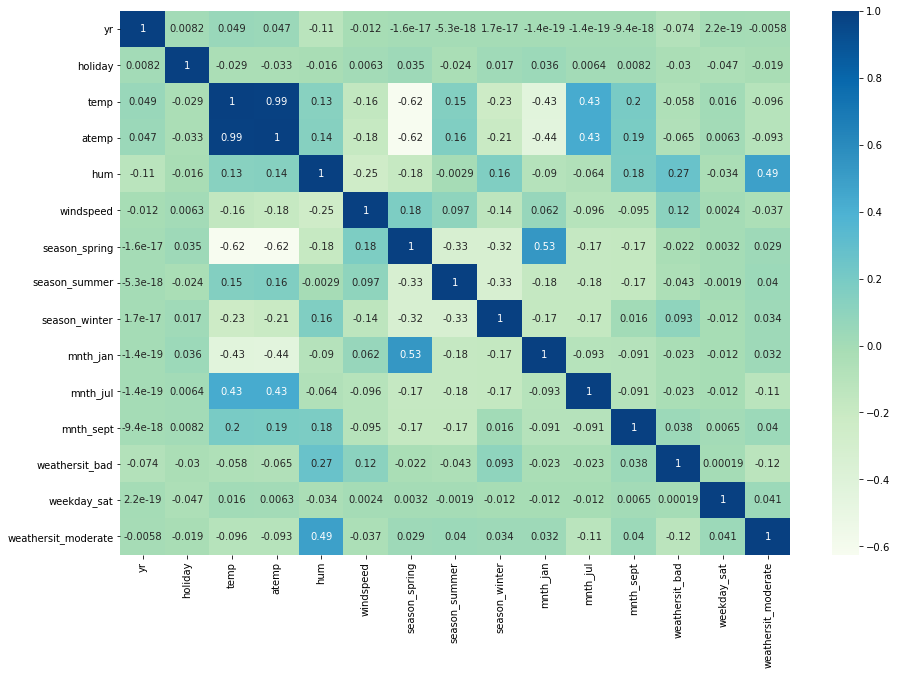

In [74]:
# check correlation of features selected byrfe with target
plt.figure(figsize=(15,10))
sns.heatmap(bike[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring','season_summer','season_winter', 'mnth_jan', 'mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weekday_sat','weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

### Model 2

In [75]:
# Dropping mnth_jan has negative coeffient and is insignifant as it has high p-value.

In [76]:
cols = ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring','season_summer','season_winter', 'mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weekday_sat','weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sun, 12 Sep 2021   Prob (F-statistic):          3.61e-182
Time:                        20:16:51   Log-Likelihood:                -4136.0
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     496   BIC:                             8366.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2626.1042    

### Model 3

In [77]:
# Dropping hum has negative coeffient and is insignifant as it has high p-value.
cols = ['yr', 'holiday', 'temp', 'atemp', 'windspeed',
       'season_spring','season_summer','season_winter', 'mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weekday_sat','weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     182.0
Date:                Sun, 12 Sep 2021   Prob (F-statistic):          2.17e-179
Time:                        20:16:59   Log-Likelihood:                -4145.3
No. Observations:                 511   AIC:                             8319.
Df Residuals:                     497   BIC:                             8378.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1785.8283    

### Model 4


In [78]:
# Dropping holiday has negative coeffient and is insignifant as it has high p-value.
cols = ['yr','temp', 'atemp', 'windspeed',
       'season_spring','season_summer','season_winter', 'mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weekday_sat','weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.3
Date:                Sun, 12 Sep 2021   Prob (F-statistic):          1.27e-178
Time:                        20:17:06   Log-Likelihood:                -4149.9
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     498   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1748.8818    

### Model 5

In [79]:
# Dropping mnth_jul has negative coeffient and is insignifant as it has high p-value.
cols = ['yr','temp', 'atemp', 'windspeed',
       'season_spring','season_summer','season_winter',
       'mnth_sept', 'weathersit_bad', 'weekday_sat','weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.0
Date:                Sun, 12 Sep 2021   Prob (F-statistic):          7.49e-179
Time:                        20:17:15   Log-Likelihood:                -4152.1
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     499   BIC:                             8379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1686.0372    

### Model 6

In [80]:
# Dropping temp has negative coeffient and is insignifant as it has high p-value.
cols = ['yr','atemp', 'windspeed',
       'season_spring','season_summer','season_winter',
       'mnth_sept', 'weathersit_bad', 'weekday_sat','weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     229.9
Date:                Sun, 12 Sep 2021   Prob (F-statistic):          7.82e-180
Time:                        20:17:20   Log-Likelihood:                -4152.6
No. Observations:                 511   AIC:                             8327.
Df Residuals:                     500   BIC:                             8374.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1681.0599    

### Model 7

In [81]:
## Trying to replace july with spring as both were highly correlated

cols = ['yr','workingday', 'windspeed',
       'mnth_jul','season_summer','season_winter',
       'mnth_sept', 'weathersit_bad', 'weekday_sat','weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.53
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           1.84e-92
Time:                        20:17:30   Log-Likelihood:                -4359.5
No. Observations:                 511   AIC:                             8741.
Df Residuals:                     500   BIC:                             8788.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3428.8800    

### Model 8

In [82]:
## Trying to replace july with spring as both were highly correlated

cols = ['yr','workingday', 'windspeed',
       'mnth_jul','season_summer','season_winter',
       'mnth_sept', 'weathersit_bad', 'weekday_sat','weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.53
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           1.84e-92
Time:                        20:17:37   Log-Likelihood:                -4359.5
No. Observations:                 511   AIC:                             8741.
Df Residuals:                     500   BIC:                             8788.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3428.8800    

### Model 9

In [83]:
## Dropping windspped with temp as windspeed was highly correlated with temp

cols = ['yr','workingday',
       'mnth_jul','season_summer','season_winter',
       'mnth_sept', 'weathersit_bad', 'weekday_sat','weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     75.85
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           9.47e-88
Time:                        20:17:43   Log-Likelihood:                -4373.0
No. Observations:                 511   AIC:                             8766.
Df Residuals:                     501   BIC:                             8808.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2736.4440    

### Model 10

In [84]:
# using the weekend 'sunday' which was dropped during RFE instead of saturday
cols = ['yr','workingday',
       'mnth_jul','season_summer','season_spring','season_winter',
       'mnth_sept', 'weathersit_bad', 'weekday_sun','weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     147.6
Date:                Sun, 12 Sep 2021   Prob (F-statistic):          3.20e-142
Time:                        20:17:47   Log-Likelihood:                -4241.5
No. Observations:                 511   AIC:                             8505.
Df Residuals:                     500   BIC:                             8552.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4681.2816    

### Model 11

In [85]:
# adding temp and removed 'season_summer' and 'workingday'

cols = ['yr',
       'mnth_jul','season_spring','season_winter',
       'mnth_sept', 'weathersit_bad', 'weekday_sun','weathersit_moderate','temp']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Sun, 12 Sep 2021   Prob (F-statistic):          9.73e-178
Time:                        20:17:51   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

#### Inference

Here VIF seems to be almost accepted .p-value for all the features is almost 0.0 and R2 is 0.816. Let us select Model 11 as our final as it has all important statstics high(R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi collinear(high VIF) variables.


Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [86]:
# build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1  =LinearRegression()
    lr1.fit(X,y)
    return lr1

In [87]:
# let us build the finalmodel using sklearn 
cols = ['yr','mnth_jul','season_spring','season_winter',
       'mnth_sept', 'weathersit_bad', 'weekday_sun','weathersit_moderate','temp']

#build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1740.7372440164277 [ 1994.67955569  -514.63181313 -1167.70089558   496.75430396
   465.92729708 -2256.10482681   190.37518346  -662.38986442
  3984.25555511]


## Model Evaluation

### Residual Analysis

In [88]:
y_train_pred = lr.predict(X_train[cols])

In [89]:
#plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

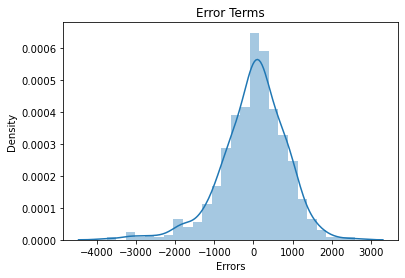

In [90]:
plot_res_dist(y_train,y_train_pred)

#### Error terms seem to be normally distributed with mean 0. So everything seems to be fine.

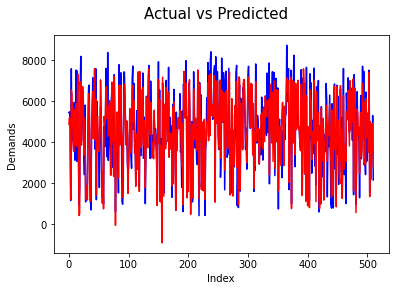

In [91]:
# ACtual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train,color='blue')
plt.plot(c,y_train_pred,color='red')
plt.suptitle('Actual vs Predicted', fontsize=15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and  Predicted result following almost same pattern so this seems to be okay.

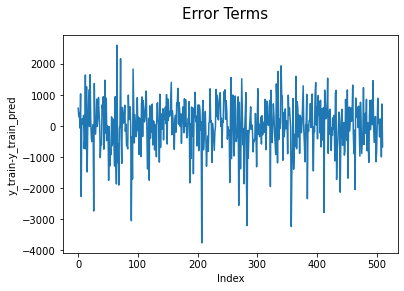

In [92]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

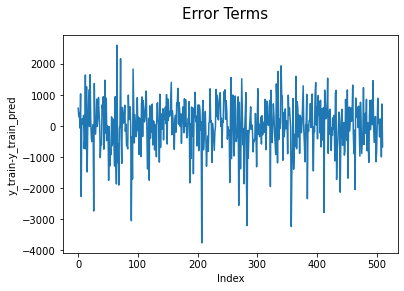

In [93]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize=15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Here we see that error terms are independant of each other.

In [94]:
#print r-squared value
r2_score(y_train,y_train_pred)

0.8158045196281631

### Linearity Check

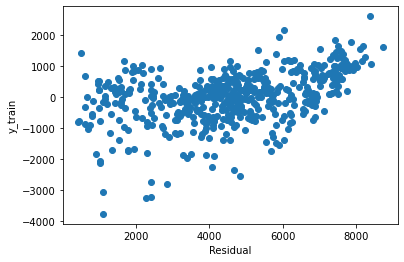

In [95]:
# Scatter plot for the check 
residual =(y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel('y_train')
plt.xlabel('Residual')
plt.show()

### Predict values for test data set

In [96]:
#Scale variables in X_test
num_vars = ['temp','hum','atemp','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [97]:
#columns from our final model
cols = ['yr','mnth_jul','season_spring','season_winter',
       'mnth_sept', 'weathersit_bad', 'weekday_sun','weathersit_moderate','temp']

#predict the values for test data
y_test_pred =lr.predict(X_test[cols])

### R-squared value for test prediction.

In [98]:
# find out the r squared value between test and predicted test data sets.
r2_score(y_test,y_test_pred)

0.8127228702995221

### Homoscedacity

R2 value for predictions on test data (0.812) is almost same as R2 value of train data(0.816). This is a good R-squared value,
hence we can see our model is peforming good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

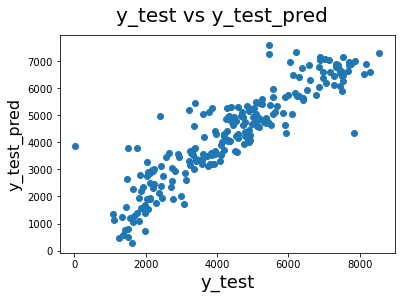

In [99]:
# plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize =20)    
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)

### Inference

we can observe that variance of the residuals (error terms) is constant across predictions
i.e error term does not very much as the value of the predictor variable changes.

### Plot Test vs Predicted Test values 

In [100]:
# function to plot actual vs predicted
# takes Actual and predicted values as input along with the scale and title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act,color='blue',linewidth=2.5,linestyle="-")
    plt.plot(c,pred,color='red',linewidth=2.5,linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize =20)
    plt.xlabel('Index', fontsize=18)
    plt.ylabel('Counts', fontsize=16)

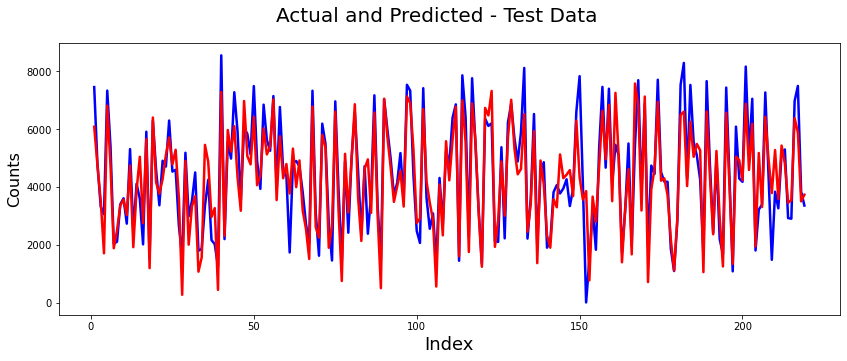

In [101]:
#plot Actual vs Predicted for test data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

### Inference

we can say that predictions are close to actuals.

## Plot Error terms for test data

In [102]:
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred,color='blue',marker='o',linewidth=2.5,linestyle="")
    fig.suptitle('Error Terms ', fontsize =20)
    plt.xlabel('Index', fontsize=18)
    plt.ylabel('Counts - Predicted Counts', fontsize=16)    

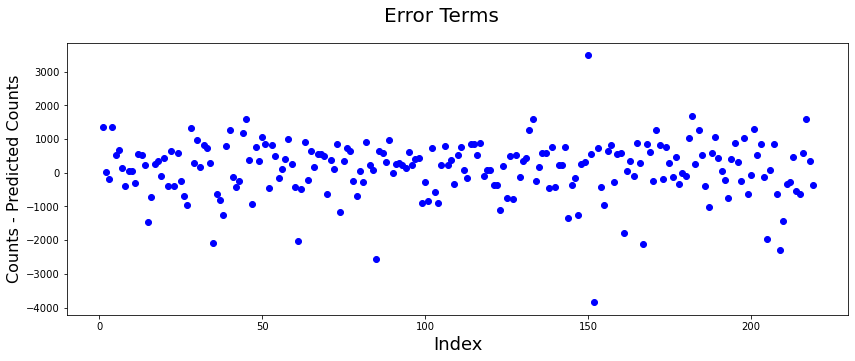

In [103]:
plot_err_terms(y_test,y_test_pred)

### Inference
As we can see the error terms are randomly distributed and there is no pattern which means the output is well explained by the model and there are no other parameters that can explain the model better.

## Making predictions 

In [104]:
#checking data before scaling
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


#### Interpreting the model

#### let us interpret the RFE with manual model results as we focus on imputation

In [105]:
#let us rebuild the final model of + rfe approach using statsmodel to interpret it
cols =['yr','mnth_jul','season_spring','season_winter',
       'mnth_sept', 'weathersit_bad', 'weekday_sun','weathersit_moderate','temp']
lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Sun, 12 Sep 2021   Prob (F-statistic):          9.73e-178
Time:                        20:20:46   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

## Interpretation Results

### Analysing the above model the company should focus on following features.
1. Company should focus on expanding business during spring.
2. Company should focus on expanding business during september.
3. Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
4. There would be less bookings during Light Snow or Rain, they could probably use this to serve the bikes without having business impact. 

#### Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.